In [1]:
import numpy as np
import numpy as np
from pathlib import Path
from ica_benchmark.io.load import load_subjects_data
from mne.time_frequency import psd_multitaper, tfr_array_multitaper, psd_array_multitaper
import matplotlib.pyplot as plt

In [2]:
root = Path("/home/paulo/Documents/datasets/BCI_Comp_IV_2a/gdf/")

subjects =  {
    "A01": [
        root / "A01T.gdf",
#         root / "A01E.gdf",
    ]
}


In [3]:
data = load_subjects_data(root, subjects)

Extracting EDF parameters from /home/paulo/Documents/datasets/BCI_Comp_IV_2a/gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/paulo/Documents/datasets/BCI_Comp_IV_2a/gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/home/paulo/anaconda3/envs/bci/lib/python3.8/site-packages/mne/io/edf/edf.py:1047: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
/home/paulo/anaconda3/envs/bci/lib/python3.8/site-packages/ica_benchmark/io/load.py:32: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  gdf_data = read_raw_gdf(filepath, preload=PRELOAD)
/home/paulo/anaconda3/envs/bci/lib/python3.8/site-packages/mne/io/edf/edf.py:1047: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
/home/paulo/anaconda3/envs/bci/lib/python3.8/site-packages/ica_benchmark/io/load.py:36: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicate

In [4]:
arr = data["A01"]["gdf"]._data.T
labels = data["A01"]["labels"]

In [5]:
X = np.expand_dims(arr.T, axis=0)
X.shape

(1, 22, 672528)

In [6]:
res = tfr_array_multitaper(X, 250, np.linspace(1, 12, 30), output="power", n_cycles=5, decim=10, n_jobs=3)
res = res.squeeze()

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:   60.0s
[Parallel(n_jobs=3)]: Done  22 out of  22 | elapsed:  1.4min finished


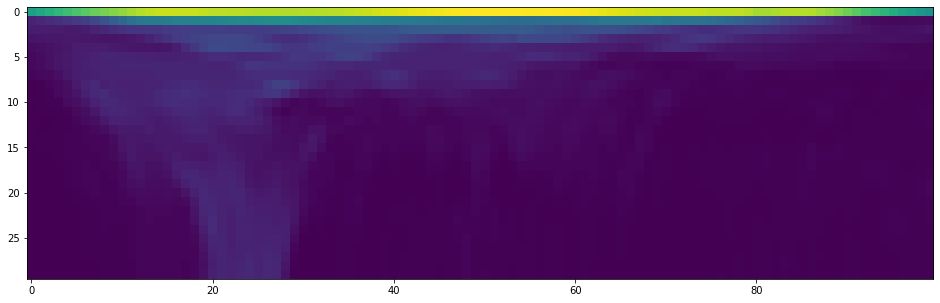

In [7]:
res = (res - res.min())/(res.max() - res.min())
plt.figure(figsize=(30, 5))
plt.imshow(res[0, :, :100])

In [8]:
from ica_benchmark.processing.dataset import WindowTransformerDataset
from torch.utils.data import IterableDataset, DataLoader, Dataset
from ica_benchmark.processing.feature import psd_feature_transform
from ica_benchmark.processing.label import label_transform


dataset = WindowTransformerDataset(
    arr,
    labels,
    psd_feature_transform,
    label_transform_fn=label_transform,
    window_size=250,
    stride=100
)

dataloader = DataLoader(
    dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4, 
    drop_last=True,
    prefetch_factor=2,
)


In [9]:
for x, y in dataset:
    print(x.shape, y.shape)


(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220

(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220

(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220

(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220

(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220

(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220

(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220

(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220

(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220

(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220,) (4,)
(220